In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

Text(0, 0.5, 'Quantity')

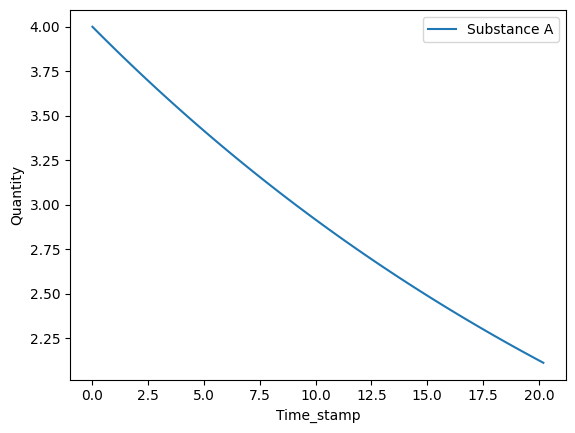

In [ ]:
half_life = 22
interval = 8
volume = 3000
dosage = 100000 #nu g
absorption_fraction = 0.12
A = (absorption_fraction * dosage)/volume
a = -np.log(0.5)/half_life
B=0
C=0
dt=0.2
b=0.3
it=0
QuantA=[A]
QuantB=[B]
QuantC=[C]
iter=[0]
t=0
plt.show()
while(t<20):
  t+=dt
  if( t % 8 == 0):
    A+=A+5
  A = A - a*A*(dt)
  QuantA.append(A)
  # B = B + a*A*dt - b*B*dt
  # QuantB.append(B)
  # C= C + b*B*dt
  # QuantC.append(C)
  iter.append(t)
  it+=1

plt.plot(iter,QuantA, label = 'Substance A')
# plt.plot(iter,QuantB, color='r', label = 'Substance B')
# plt.plot(iter,QuantC, color= 'g', label = 'Substance C')
plt.legend()
plt.xlabel('Time_stamp')
plt.ylabel('Quantity')



0.03150669002545206
0.0
8.0
16.0
24.0
32.0
40.0
48.0
56.0
64.0
72.0
80.0
88.0
96.0
104.0
112.0
120.0
128.0
136.0
144.0
152.0
160.0


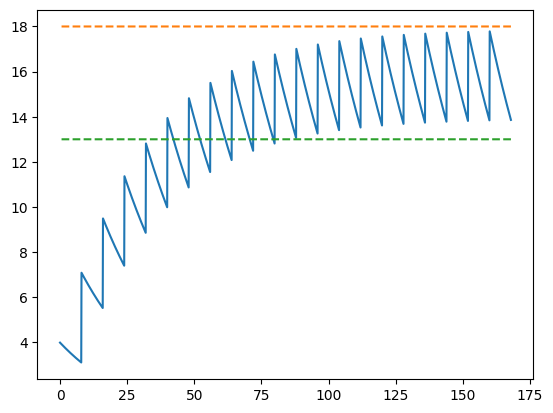

In [ ]:
half_life = 22
interval = 8
volume = 3000
dosage = 100000 #nu g
absorption_fraction = 0.12
entering = (absorption_fraction * dosage)/volume
elimination_constant = -np.log(0.5)/half_life
print(elimination_constant)

xlim1=[]
xlim2=[]
time = []
concentration = []
drug_in_system = 0
delT = 0.1

for i in np.arange(0, 168, delT):
    if (i % interval == 0):
      drug_in_system = drug_in_system + entering
      print(i)
    time = np.append(i, time)
    A_rem = elimination_constant * drug_in_system * delT
    drug_in_system = (drug_in_system - A_rem)
    concentration = np.append(drug_in_system, concentration)
    xlim1.append(18)
    xlim2.append(13)

plt.plot(time,concentration)
plt.plot(time,xlim1, linestyle='dashed')
plt.plot(time,xlim2, linestyle='dashed')


In [ ]:
t=0
dt=0.1
num=8
while(t<168):
  t+=dt
  if(t % 8.0 == 0):
    print(t)
# for t in np.arange(0, 168, delT):
#       if(t%8==0):
#         print(t)
#       t+=dt
# print(t)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000

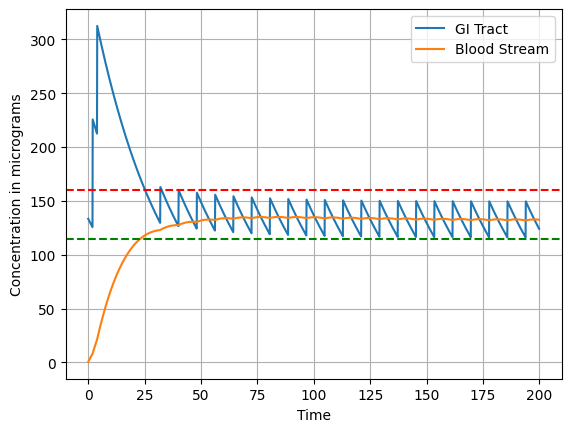

In [ ]:
  #loading dosee
  dosage_initial=[400,300,300]
  dt=0.1
  k=0
  k_1=elimination_constant
  k2=k_1
  t=0
  it=0
  time=[]
  con=[]
  for i in np.arange(0,24,dt):
      if(i/2==k and k<3):
          it+=dosage_initial[k]
          k+=1
          con.append(it)
          time.append(i)
      else:
        it = it - k_1*it*dt
        con.append(it)
        time.append(i)
  #normal dosage
  p=24
  count=0
  for i in np.arange(24,200,dt):
      if(count==80):
        it+=100
        con.append(it)
        time.append(i)
        count=0
      else:
        it=it-k_1*it*dt
        con.append(it)
        time.append(i)
        count+=1
  concentration=np.array(con)
  concentration=concentration/3
  plt.plot(time,concentration, label='GI Tract')
  plt.legend()



  # #######
  inblood=0
  coninblood=[]
  for i in range(2000):
    inblood = inblood - k2*dt*inblood + k_1*dt*con[i]
    if(inblood<0):
      inblood=0
    coninblood.append(inblood)
  concent=np.array(coninblood)
  concent=concent/3
  plt.plot(time,concent, label='Blood Stream')
  print(time)
  print(con)
  plt.axhline(y = 160, linestyle='dashed', color='red')
  plt.axhline(y = 115, linestyle='dashed', color='green')
  plt.ylabel('Concentration in micrograms')
  plt.xlabel('Time')
  plt.legend()
  plt.grid(True)

Here, there are spikes when the dilantin tablet is consumed

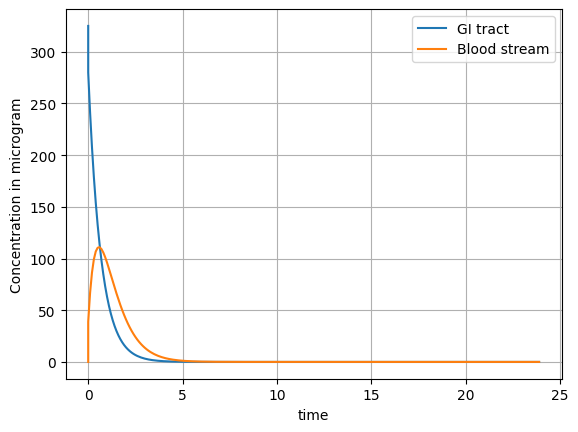

In [ ]:
#1
#compartment 1
#considering the power of asipirin 100 mg
time=[0]
var1=325
gi=[325]
bs=[0]
volume=3
var2=0
for i in np.arange(0,24,dt):
    var1= var1 - 1.386*dt*var1
    var2 = var2 +  1.386*dt*var1 - 1.386*dt*var2
    gi.append(var1)
    bs.append(var2)
    time.append(i)
plt.plot(time,gi, label='GI tract')
plt.plot(time,bs, label='Blood stream')
plt.ylabel('Concentration in microgram')
plt.xlabel('time')
plt.grid(True)
plt.legend()

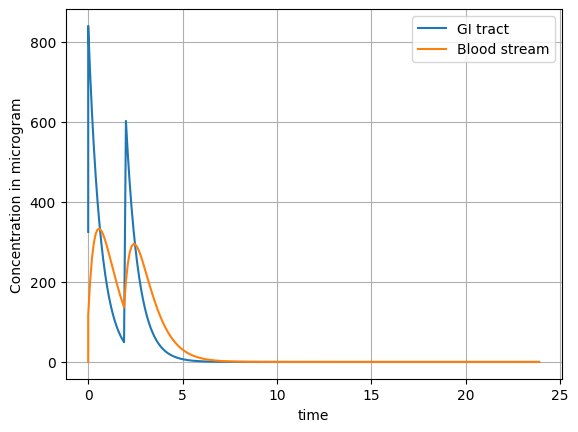

In [ ]:
#2
#considering the power of asipirin
time=[0]
var1=325*3
gi=[325]
bs=[0]
volume=3
var2=0
for i in np.arange(0,24,dt):
    if(i==2):
        var1+=325*2
    var1= var1 - 1.386*dt*var1
    var2 = var2 +  1.386*dt*var1 - 1.386*dt*var2
    gi.append(var1)
    bs.append(var2)
    time.append(i)
plt.plot(time,gi, label='GI tract')
plt.plot(time,bs,label='Blood stream')
plt.ylabel('Concentration in microgram')
plt.xlabel('time')
plt.grid(True)
plt.legend()

here the power of aspiring in considered 325 mg so we get two peaks where the concentration of aspirin shoots up, these are the points where the tablet is consumed and enters the GI tract. Considering the half life given, the rate constant comes out to be about 0.216 which for simplicity is considered same for GI tract as well as blood stream.